<a href="https://colab.research.google.com/github/andreRibeiro1989/medium/blob/main/clip_getting_started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%bash
which python
python --version

/usr/local/bin/python
Python 3.7.10


In [2]:
%%bash

# make sure the conda path is clear so it does not conflict with conda
export PYTHONPATH=""

# download and install miniconda
conda_version='Miniconda3-py37_4.9.2-Linux-x86_64.sh'
wget https://repo.anaconda.com/miniconda/${conda_version}
chmod +x ${conda_version}
./${conda_version} -b -f -p /usr/local

# update miniconda
conda install --channel defaults conda python=3.7 --yes
conda update --channel defaults --all --yes

PREFIX=/usr/local
Unpacking payload ...
Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - brotlipy==0.7.0=py37h27cfd23_1003
    - ca-certificates==2020.10.14=0
    - certifi==2020.6.20=pyhd3eb1b0_3
    - cffi==1.14.3=py37h261ae71_2
    - chardet==3.0.4=py37h06a4308_1003
    - conda-package-handling==1.7.2=py37h03888b9_0
    - conda==4.9.2=py37h06a4308_0
    - cryptography==3.2.1=py37h3c74f83_1
    - idna==2.10=py_0
    - ld_impl_linux-64==2.33.1=h53a641e_7
    - libedit==3.1.20191231=h14c3975_1
    - libffi==3.3=he6710b0_2
    - libgcc-ng==9.1.0=hdf63c60_0
    - libstdcxx-ng==9.1.0=hdf63c60_0
    - ncurses==6.2=he6710b0_1
    - openssl==1.1.1h=h7b6447c_0
    - pip==20.2.4=py37h06a4308_0
    - pycosat==0.6.3=py37h27cfd23_0
    - pycparser==2.20=py_2
    - pyopenssl==19.1.0=pyhd3eb1b0_1
    - pysocks==1.7.1=py37_1
    - python==3.7.9=h7579374_0
    - readline==8.0=h7b6447c_0
    - 

--2021-06-22 20:36:59--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.9.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 90040905 (86M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.9.2-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 11.1M 8s
    50K .......... .......... .......... .......... ..........  0% 9.78M 8s
   100K .......... .......... .......... .......... ..........  0% 25.1M 7s
   150K .......... .......... .......... .......... ..........  0% 18.4M 6s
   200K .......... .......... .......... .......... ..........  0% 40.5M 5s
   250K .......... .......... .......... .......... ..........  0% 27.5M 5s
   300K .......... .......... .......... .......... ..........  0% 40.3M 5s
   350K .......... .......... .........

In [3]:
%%bash
which python
python --version

/usr/local/bin/python
Python 3.7.10


In [4]:
%%bash

# install dependencies to clip
conda install --yes -c pytorch pytorch=1.7.1 torchvision cudatoolkit=11.0
pip install ftfy regex tqdm wget

# install clip
pip install git+https://github.com/openai/CLIP.git

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=11.0
    - pytorch=1.7.1
    - torchvision


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB
    cudatoolkit-11.0.221       |       h6bb024c_0       622.9 MB
    freetype-2.10.4            |       h5ab3b9f_0         596 KB
    intel-openmp-2021.2.0      |     h06a4308_610         1.3 MB
    jpeg-9b                    |       h024ee3a_2         214 KB
    lcms2-2.12                 |       h3be6417_0         312 KB
    libpng-1.6.37              |       hbc83047_0         278 KB
    libtiff-4.2.0              |       h85742a9_0         502 KB
    libuv-1.40.0               |       h7b6447c_0         736 KB
    libwebp-base-1.2.0         |       h27cfd23_0         437 KB
    lz4-c-1.9.3      

  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-j7t379mg


In [5]:
import sys

# make sure the conda libraries are recognized here
_ = sys.path.append("/usr/local/lib/python3.7/site-packages")

In [6]:
import torch
import clip

device = "cuda" if torch.cuda.is_available() else "cpu"

# load model and image preprocessing
model, preprocess = clip.load("ViT-B/32", device=device, jit=False)

100%|███████████████████████████████████████| 354M/354M [00:10<00:00, 34.7MiB/s]
/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:281: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


Image to be processed


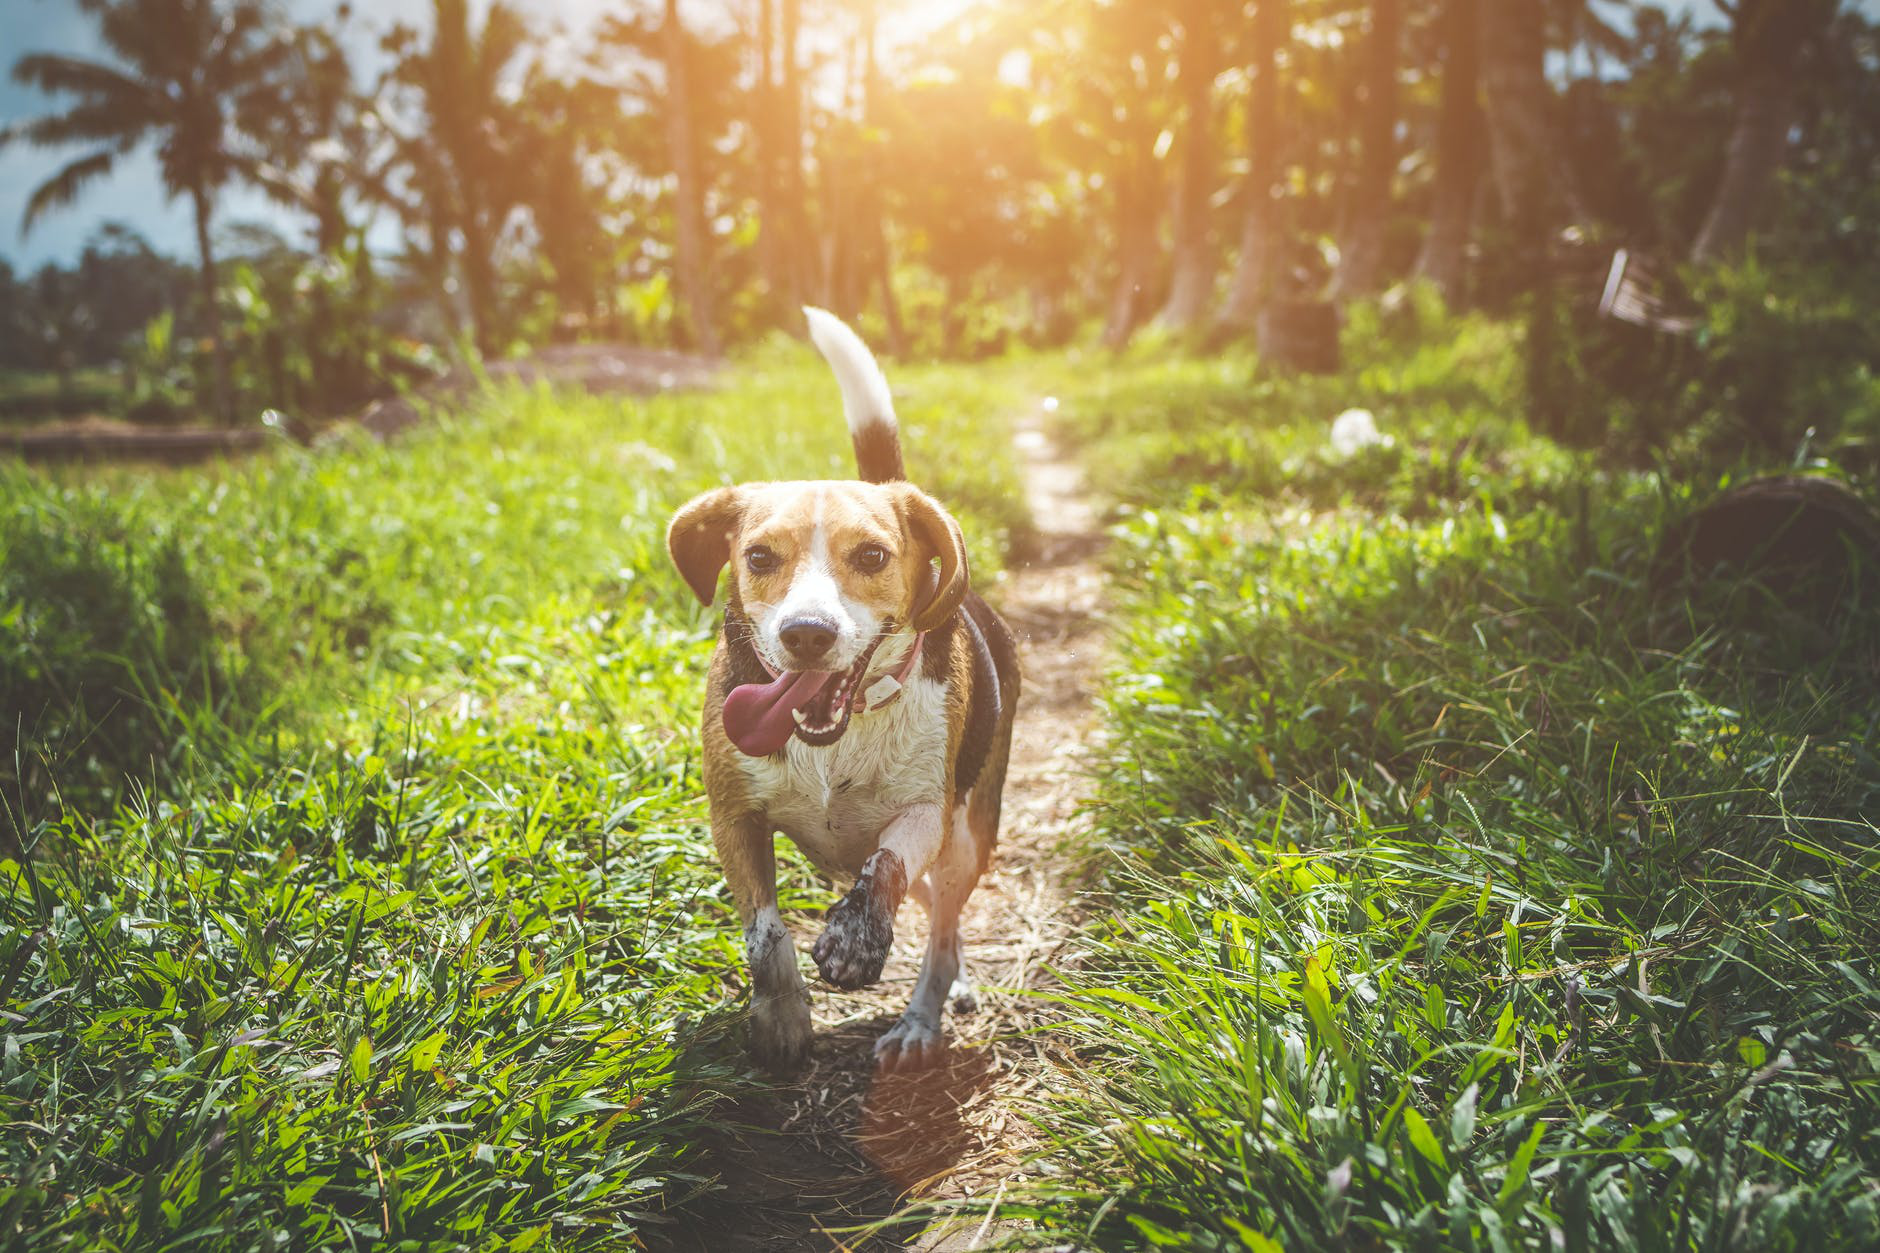



Tensor shape:
torch.Size([1, 3, 224, 224])


In [7]:
from PIL import Image
import requests

# Set up the image URL
image_name = "pexels-photo-1485637.jpeg"
image_url = f"https://images.pexels.com/photos/1485637/{image_name}?auto=compress&cs=tinysrgb&dpr=2&h=650&w=940"

# load image
image = Image.open(requests.get(image_url, stream=True).raw)
print("Image to be processed")
display(image)

# pre-process image
image = preprocess(image).unsqueeze(0).to(device)
print("\n\nTensor shape:")
print(image.shape)

In [8]:
with torch.no_grad():
    image_features = model.encode_image(image)
print(image_features.shape)

torch.Size([1, 512])


In [9]:
text_snippets = ["a photo of a dog", "a photo of a cat", "a photo of a tiger"]

# pre-process text
text = clip.tokenize(text_snippets).to(device)
print(text.shape)

torch.Size([3, 77])


In [10]:
with torch.no_grad():
    text_features = model.encode_text(text)
print(text_features.shape)

torch.Size([3, 512])


In [11]:
with torch.no_grad():
    logits_per_image, logits_per_text = model(image, text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print("Label probs:", probs)

Label probs: [[0.98320836 0.00311525 0.01367633]]
